In [3]:
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y 
!pip install lxml==4.6.4
#!pip install plotly==5.3.1
!pip install yfinance==0.2.4
#!pip install pandas==1.3.3


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━╸━━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [18]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [15]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height = 900,
    title = stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [5]:
# Question 1 - Extracting Tesla Stock Data Using yfinance
tesla = yf.Ticker("TSLA")

tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [12]:
# Question 2 - Extracting Tesla Revenue Data Using Webscraping
data = requests.get("https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue").text
soup = BeautifulSoup(data, "html.parser")
tables = soup.find_all('table')

for index, table in enumerate(tables):
    if "Tesla Quarterly Revenue" in str(table):
        table_index = index

tesla_revenue = pd.read_html(str(tables[1]), flavor="bs4")[0]

tesla_revenue = tesla_revenue.rename(columns={'Tesla Quarterly Revenue(Millions of US $)': 'Date', 'Tesla Quarterly Revenue(Millions of US $).1': 'Revenue'})
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


,Date,Revenue
50,2010-09-30,31
51,2010-06-30,28
52,2010-03-31,21
54,2009-09-30,46
55,2009-06-30,27


In [7]:
# Question 3 - Extracting GameStop Stock Data Using yfinance
gme = yf.Ticker("GME")

gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [14]:
# Question 4 - Extracting GameStop Revenue Data Using Webscraping
data = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html").text
soup = BeautifulSoup(data,"html.parser")
tables = soup.find_all('table')

for index, table in enumerate(tables):
    if "GameStop Quarterly Revenue" in str(table):
        table_index = index

gme_revenue = pd.read_html(str(tables[1]), flavor="bs4")[0]

gme_revenue = gme_revenue.rename(columns={'GameStop Quarterly Revenue(Millions of US $)': 'Date', 'GameStop Quarterly Revenue(Millions of US $).1': 'Revenue'})
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.tail()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


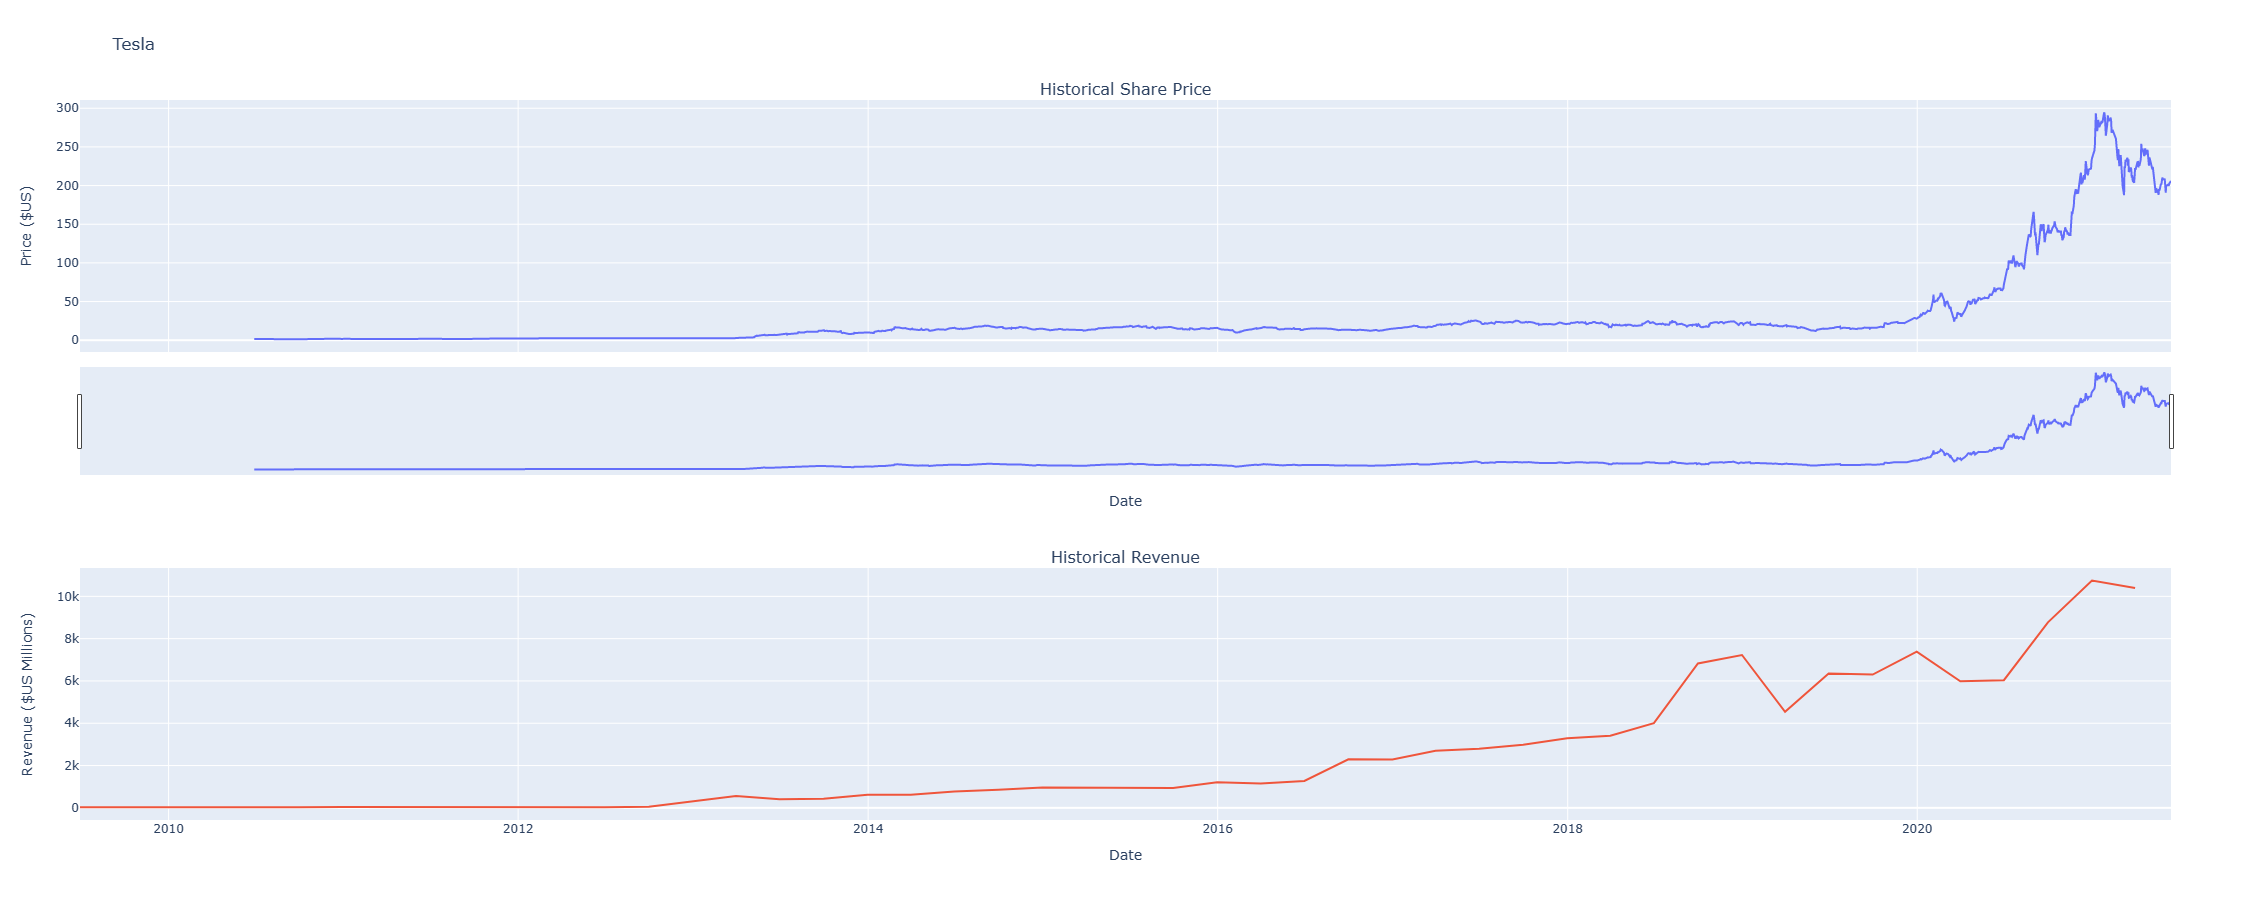

In [21]:
# Question 5 - Tesla Stock and Revenue Dashboard
make_graph(tesla_data, tesla_revenue, 'Tesla')


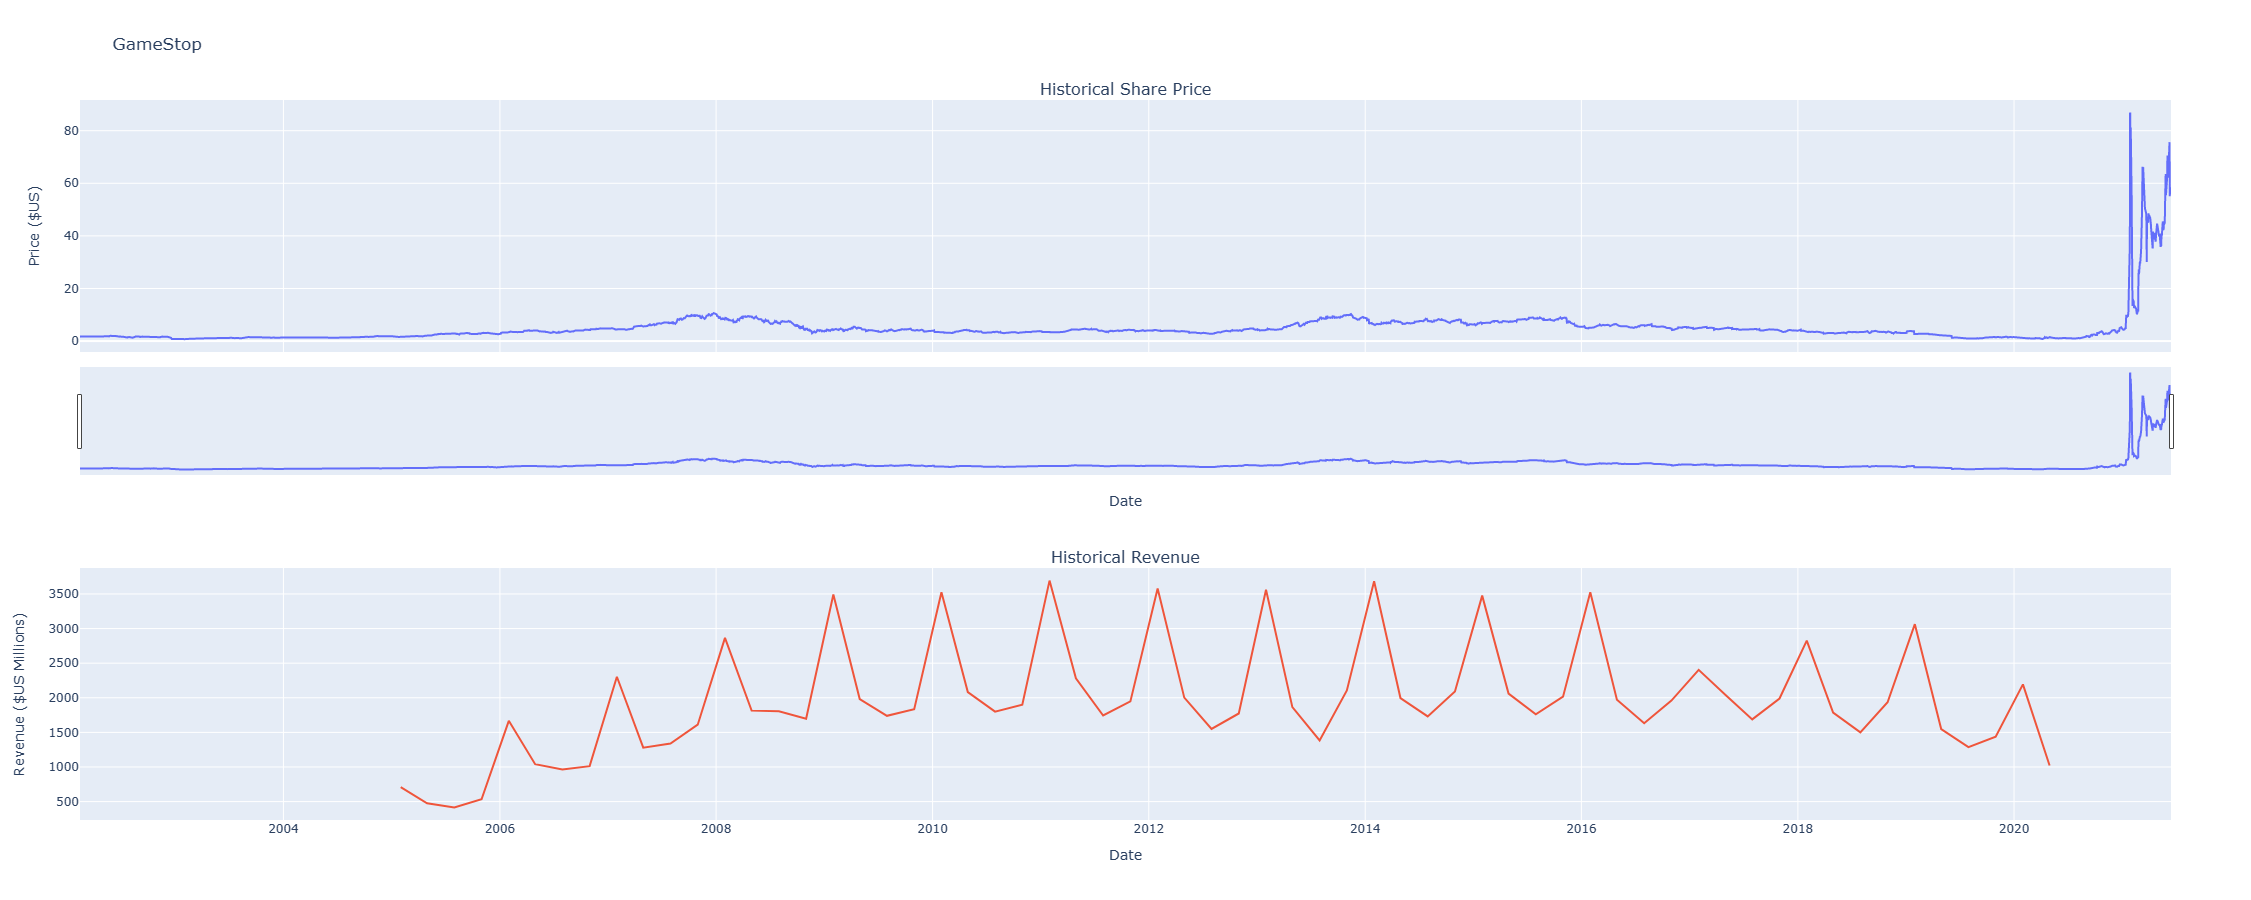

In [20]:
# Question 6 - GameStop Stock and Revenue Dashboard
make_graph(gme_data, gme_revenue, 'GameStop')